In [2]:
import tensorflow as tf

#激活函数的使用

"""
tf.nn.relu()
tf.nn.sigmoid()
tf.nn.tanh()

"""

#神经网络层数不计输入层  

'\ntf.nn.re\n\n'

In [8]:
#优化  loss  均方误差mse  交叉商 cross entropy
'''
loss_mse = tf.reduce_mean(tf.square(y-y_))

交叉商代表两个概率分布之间的距离

ce = -tf.reduce_mean（y_*tf.log(tf.clip_by_value(y,1e-12,1.0))
自己去看看解释


'''

#————————下面是一个拟合酸奶日销量和的公式  的单层神经网络——————
#重点看自定义损失函数  不同的定义会造成预测不同的偏向
import numpy as np


batch_size = 8
seed = 23455
cost = 1
profit = 9
#基于seed生成随机数
rdm =  np.random.RandomState(seed)

# 随机数返回32 行 2列 的矩阵  表示32组 体积和重量  作为输入数据集
X = rdm.rand(32,2)

#如果小于1给Y赋值 1(合格)  如果不小于1给Y赋值0（不合格）   （逻辑判断）
#结果作为数据集的标签(答案)
Y_ = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1,x2) in X] 
print(X,Y_)

#       1-定义神经网络输入、参数、输出，定义前向传播过程
x = tf.placeholder(tf.float32,shape=(None,2))
y_ = tf.placeholder(tf.float32,shape=(None,1))

w1 = tf.Variable(tf.random_normal([2,1],stddev=1,seed=1))
#w2 = tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

#a = tf.matmul(x,w1)
y = tf.matmul(x,w1)

#       2-定义loss函数以及反向传播
loss = tf.reduce_mean(tf.square(y-y_))
# 但是真实情况下  酸奶成本1元  利润9元   预测少了损失大  所以需要如下loss函数
loss = tf.reduce_sum(tf.where(tf.greater(y,y_),(y-y_)*cost,(y_-y)*profit))

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
#train_step = tf.train.MomentumOptimizer(learning_rate).minimize(loss)
#train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)


#       3-生成session，训练steps轮
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    #输出目前未被训练的参数 w1 w2
    print('w1',sess.run(w1))
    print('\n')
    
    #训练模型
    steps = 20000
    for i in range(steps):
        start = (i*batch_size)%32  #这里就是minibatch的用法
        end = start + batch_size
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i %500 ==0:
            total_loss = sess.run(loss,feed_dict={x:X,y_:Y_})
            print('当前loss值',total_loss)
            print('w1',sess.run(w1))
    #训练结束后再次输出参数
    #print('w1',sess.run(w1))


[[0.83494319 0.11482951]
 [0.66899751 0.46594987]
 [0.60181666 0.58838408]
 [0.31836656 0.20502072]
 [0.87043944 0.02679395]
 [0.41539811 0.43938369]
 [0.68635684 0.24833404]
 [0.97315228 0.68541849]
 [0.03081617 0.89479913]
 [0.24665715 0.28584862]
 [0.31375667 0.47718349]
 [0.56689254 0.77079148]
 [0.7321604  0.35828963]
 [0.15724842 0.94294584]
 [0.34933722 0.84634483]
 [0.50304053 0.81299619]
 [0.23869886 0.9895604 ]
 [0.4636501  0.32531094]
 [0.36510487 0.97365522]
 [0.73350238 0.83833013]
 [0.61810158 0.12580353]
 [0.59274817 0.18779828]
 [0.87150299 0.34679501]
 [0.25883219 0.50002932]
 [0.75690948 0.83429824]
 [0.29316649 0.05646578]
 [0.10409134 0.88235166]
 [0.06727785 0.57784761]
 [0.38492705 0.48384792]
 [0.69234428 0.19687348]
 [0.42783492 0.73416985]
 [0.09696069 0.04883936]] [[0.969797861054287], [1.1634604857835003], [1.1942714411690643], [0.5384488448601839], [0.8632760602061649], [0.8339321949148727], [0.9280893354024469], [1.6879345369421652], [0.9036674505700479], [

In [16]:
#学习率 (学习率衰减)
#简单版本就是不加衰减  

'''
指数衰减的学习率： 大了会震荡，小了又很慢
所以 弄一个 基数然后每多少轮乘上一个衰减率

learning_rate = learning_rate_base * learning_rate_decay * global_step/learning_rate_step
'''
learning_rate_base = 0.1 #最初学习率
learning_rate_decay = 0.99 #衰减率
learning_rate_step = 1 #喂入多少轮 batch_size后更新一次学习率

#计算运行了几轮batch_size的计数器   超参数 不被训练
global_step = tf.Variable(0,trainable = False)
#定义指数下降学习率  最后一个参数是取整or取小树  决定学习率平滑减少还是阶梯减少
learning_rate = tf.train.exponential_decay(learning_rate_base,global_step,learning_rate_step,learning_rate_decay,staircase=True)

w = tf.Variable(tf.constant(5,dtype=tf.float32))

loss = tf.square(w+1)
#要让loss最小，w应该是 -1

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step = global_step)
#简单版本不需要这个global_step  然后optimizer这里直接写入0.1
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    for i in range(40):
        sess.run(train_step)
        w_val = sess.run(w)
        loss_val = sess.run(loss)
        learning_rate_val = sess.run(learning_rate)
        global_step_val = sess.run(global_step)
        print(("after %s steps:w is %f loss is %f")%(i,w_val,loss_val),learning_rate_val,global_step_val)
        
    

after 0 steps:w is 3.800000 loss is 23.040001 0.099 1
after 1 steps:w is 2.849600 loss is 14.819419 0.09801 2
after 2 steps:w is 2.095001 loss is 9.579033 0.0970299 3
after 3 steps:w is 1.494386 loss is 6.221961 0.096059605 4
after 4 steps:w is 1.015167 loss is 4.060896 0.09509901 5
after 5 steps:w is 0.631886 loss is 2.663051 0.094148025 6
after 6 steps:w is 0.324608 loss is 1.754587 0.09320655 7
after 7 steps:w is 0.077684 loss is 1.161403 0.09227448 8
after 8 steps:w is -0.121202 loss is 0.772287 0.09135174 9
after 9 steps:w is -0.281761 loss is 0.515867 0.09043822 10
after 10 steps:w is -0.411674 loss is 0.346128 0.089533836 11
after 11 steps:w is -0.517024 loss is 0.233266 0.0886385 12
after 12 steps:w is -0.602644 loss is 0.157891 0.08775212 13
after 13 steps:w is -0.672382 loss is 0.107334 0.0868746 14
after 14 steps:w is -0.729305 loss is 0.073276 0.08600585 15
after 15 steps:w is -0.775868 loss is 0.050235 0.085145794 16
after 16 steps:w is -0.814036 loss is 0.034583 0.0842943

In [18]:
# 滑动平均 
'''
记录了每个参数一段时间内过往值的平均，增加模型泛化性
针对所有参数 wb

滑动 = 衰减率*影子 + （1 - 衰减率）*参数
衰减率 = min{moving_average_decay ,1+轮数/10+轮数}
其中 moving_average_decay=0.99 ，w1 = 10 ，globel_step = 100（100轮）  时的公式为：
mov = min(0.99,101/110)*0.9 + (1-min(0.99,101/110)*10)   0.9是前一次计算出来的mov


代码：
ema = tf.train.ExponentialMovingAverage(moving_average_decay,globel_step)

ema_op = ema.apply(tf.trainable_variables()) 对所有待优化的参数求滑动平均

with tf.control_dependnecies([train_step,ema_op]):
    train_op = tf.no_op(name = 'train')
这里的意义是把训练过程和求滑动平均联系在一起作为一个节点一起运行
'''
#   1 定义变量以及滑动平均类
w1 = tf.Variable(0,dtype=tf.float32)

globel_step = tf.Variable(0,trainable= False)

moving_average_decay = 0.99
ema = tf.train.ExponentialMovingAverage(moving_average_decay,globel_step)

ema_op = ema.apply(tf.trainable_variables())   #当然也可以只填入w1
#每次sess.run(ema_op)的时候这个函数就会对所有可训练的值更行一次滑动平均

with tf.Session() as sess:#这次没有用for 循环而是直接模拟循环了100次之后
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run([w1,ema.average(w1)]))
    sess.run(tf.assign(w1,1)) #给w1赋值1
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))
    
    sess.run(tf.assign(w1,10))
    sess.run(tf.assign(global_step,100))
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))
    
    


[0.0, 0.0]
[1.0, 0.9]
[10.0, 9.09]


after 0 loss is 2.746305
after 2000 loss is 0.748933
after 4000 loss is 0.350239
after 6000 loss is 0.160363
after 8000 loss is 0.097833
after 10000 loss is 0.085644
after 12000 loss is 0.080508
after 14000 loss is 0.077827
after 16000 loss is 0.076651
after 18000 loss is 0.075833
after 20000 loss is 0.075312
after 22000 loss is 0.074965
after 24000 loss is 0.074635
after 26000 loss is 0.074332
after 28000 loss is 0.073985
after 30000 loss is 0.073701
after 32000 loss is 0.073482
after 34000 loss is 0.073310
after 36000 loss is 0.073156
after 38000 loss is 0.072971


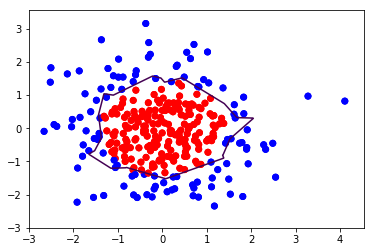

after 0 loss is 26.489704
after 2000 loss is 7.813092
after 4000 loss is 2.843301
after 6000 loss is 1.557009
after 8000 loss is 0.905258
after 10000 loss is 0.541403
after 12000 loss is 0.355632
after 14000 loss is 0.246563
after 16000 loss is 0.189820
after 18000 loss is 0.196892
after 20000 loss is 0.202785
after 22000 loss is 0.207231
after 24000 loss is 0.211103
after 26000 loss is 0.214513
after 28000 loss is 0.218562
after 30000 loss is 0.222986
after 32000 loss is 0.227508
after 34000 loss is 0.231320
after 36000 loss is 0.233510
after 38000 loss is 0.233956


D:\Anaconda\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


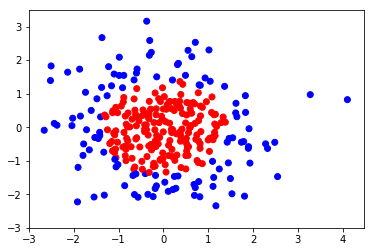

In [31]:
# 正则化（缓解过拟合）
'''
在loss中引入模型复杂度指标，给w加权，弱化训练数据的噪声（不对b处理，b本身也是为了减少方差）

loss = loss(y,y_) + regularizer*loss(w)

loss(w) = tf.contrib.layers.l1_regularizer(regularizer)(w)
loss(w) = tf.contrib.layers.l2_regularizer(regularizer)(w)

tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w)
loss = cem + tf.add_n(tf.get_collection('losses'))
'''
import numpy as np
import matplotlib.pyplot as plt
batch_size = 30
seed =2
 
#产生随机数
rdm = np.random.RandomState(seed)
X = rdm.randn(300,2)
#生成300行2列的 作为 点  如果两个坐标平方和小于2赋值1  else 0
Y_ = [int(x0*x0 + x1*x1 < 2)for (x0,x1) in X]
Y_c = [['red'if y else 'blue']for y in Y_] #可视化如果是1 就是red 其余是 blue

#对数据reshape处理
X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)
#print(X)
#print(Y_)
#print(Y_c)

#用plt画出点阵图
plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y_c))

#定义神经网络输入、参数、输出，定义前向传播过程
def get_weight(shape,regularizer):
    w = tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    tf.add_to_collection('losses',tf.contrib.layers.l1_l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    b = tf.Variable(tf.constant(0.01,shape=shape))
    return b

x = tf.placeholder(tf.float32,shape=(None,2))
y_ = tf.placeholder(tf.float32,shape=(None,1))

w1 = get_weight([2,11],0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = get_weight([11,1],0.01)
b2 = get_bias([1])   
y = tf.matmul(y1,w2)+b2 

#定义loss
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))

#定义反向传播：不含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    steps = 40000
    for i in range(steps):
        start = (i*batch_size)%300
        end = start + batch_size
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i%2000 == 0:
            loss_mse_val = sess.run(loss_mse,feed_dict={x:X,y_:Y_})
            print(('after %d loss is %f')%(i,loss_mse_val))
    #生成网络坐标点
    xx,yy = np.mgrid[-3:3:0.01,-3:3:0.01]
    grid = np.c_[xx.ravel(),yy.ravel()]
    probs = sess.run(y,feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels = [0.5])
plt.show()

#定义反向传播：含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    steps = 40000
    for i in range(steps):
        start = (i*batch_size)%300
        end = start + batch_size
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i%2000 == 0:
            loss_mse_val = sess.run(loss_mse,feed_dict={x:X,y_:Y_})
            print(('after %d loss is %f')%(i,loss_mse_val))
    #生成网络坐标点
    xx,yy = np.mgrid[-3:3:0.01,-3:3:0.01]
    grid = np.c_[xx.ravel(),yy.ravel()]
    probs = sess.run(y,feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

plt.scatter(X[:,0],X[:,1],c = np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels = [0.5])
plt.show()